In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_crime = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
df_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
df_crime.shape

(13490604, 7)

In [6]:
df_crime['major_category'].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [7]:
df_crime['minor_category'].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

In [8]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [9]:
df_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [ ]:
#merubah nama kolom

In [20]:
df_crime.columns = ['LSOA_Code','Borough','Major_Category','Minor_Category','Value','Year','Month']
df_crime.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,Value,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [ ]:
#Question 1 : Perubahan jumlah criminal case di Wilayah London periode tahun 2011 - 2016 ?

In [24]:
df_Borough = df_crime[
    (df_crime['Year']>2010)
].groupby(['Borough'])['Value'].sum()
df_Borough

Borough
Barking and Dagenham       96948
Barnet                    141382
Bexley                     71220
Brent                     153787
Bromley                   118904
Camden                    179721
City of London               780
Croydon                   171621
Ealing                    162638
Enfield                   129945
Greenwich                 121081
Hackney                   154222
Hammersmith and Fulham    120993
Haringey                  141688
Harrow                     75181
Havering                   94057
Hillingdon                137336
Hounslow                  127120
Islington                 153835
Kensington and Chelsea    113095
Kingston upon Thames       58311
Lambeth                   197565
Lewisham                  138369
Merton                     74623
Newham                    172934
Redbridge                 121200
Richmond upon Thames       64446
Southwark                 183396
Sutton                     63772
Tower Hamlets             160004
Wa

In [41]:
df_Borough_Year = df_crime[(df_crime['Year']>2010)].groupby(['Year','Borough']).agg({'Value': 'sum'})
df_Borough_Year.head()

Value
Year Borough                    
2011 Barking and Dagenham  16686
     Barnet                24007
     Bexley                11325
     Brent                 27669
     Bromley               19868

In [42]:
df_Borough = df_Borough_Year.reset_index()[['Borough','Value']].groupby(['Borough']).agg({'Value': 'sum'})
df_Borough.head()

,Value
Borough,
Barking and Dagenham,96948
Barnet,141382
Bexley,71220
Brent,153787
Bromley,118904


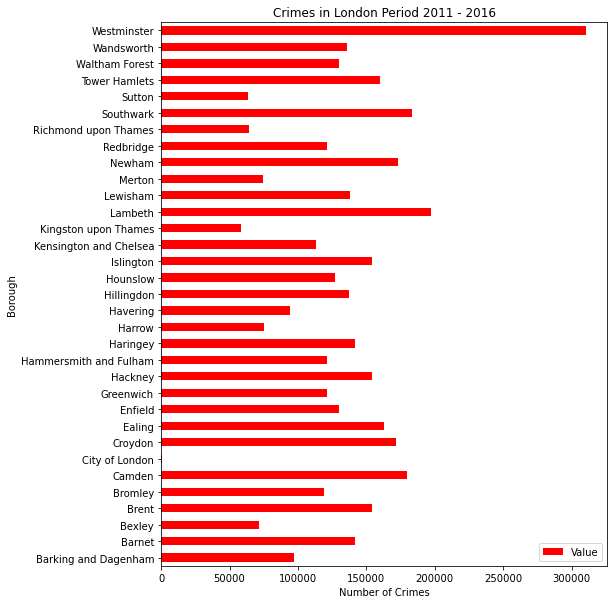

In [61]:
df_Borough.plot(kind = 'barh', figsize=(8,10), color='red')

plt.title('Crimes in London Period 2011 - 2016')
plt.xlabel('Number of Crimes')
plt.ylabel('Borough')

plt.show()

In [ ]:
#Wetminster merupakan daerah dengan criminal case tertinggi di London sepanjang tahun 2011-2016 yang mencapai angka lebih dari 400.000 cases.
#City of London merupakan daerah dengan criminal case terendah di London sepanjang tahun 2011-2016 dengan angka yang sangat kecil yaitu kurang dari 10.000 cases.

In [65]:
Major_Crime_Category = df_crime[(df_crime['Year'] >2010)].groupby(['Year','Major_Category']).agg({'Value': 'sum'})
Major_Crime_Category.head()

Value
Year Major_Category                  
2011 Burglary                   93315
     Criminal Damage            70914
     Drugs                      57550
     Fraud or Forgery               0
     Other Notifiable Offences  10264

In [66]:
Major_Crime_Category.tail()

Value
Year Major_Category                     
2016 Other Notifiable Offences     15809
     Robbery                       22528
     Sexual Offences                   0
     Theft and Handling           294133
     Violence Against the Person  232381

In [71]:
Major_Crime = Major_Crime_Category.reset_index()[['Major_Category','Value']].groupby(['Major_Category']).agg({'Value': 'sum'})
Major_Crime.head()

,Value
Major_Category,
Burglary,488756
Criminal Damage,375604
Drugs,282738
Fraud or Forgery,0
Other Notifiable Offences,74825


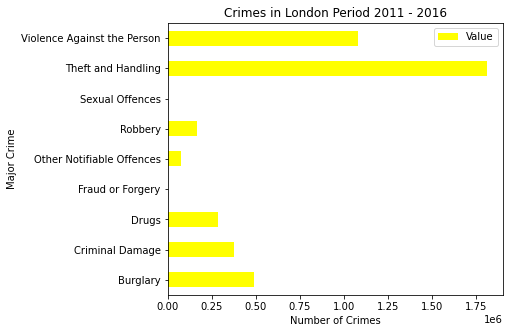

In [73]:
Major_Crime.plot(kind = 'barh', figsize=(6,5), color='yellow')

plt.title('Crimes in London Period 2011 - 2016')
plt.xlabel('Number of Crimes')
plt.ylabel('Major Crime')

plt.show()

In [ ]:
#Theft and Handling merupakan criminal case tertinggi di tahun 2011-2016.
#Sexual Offences & Fraud of Forgery merupakan criminal case terendah di tahun 2011-2016.

In [74]:
Major_Crime.info

<bound method DataFrame.info of                                Value
Major_Category                      
Burglary                      488756
Criminal Damage               375604
Drugs                         282738
Fraud or Forgery                   0
Other Notifiable Offences      74825
Robbery                       167337
Sexual Offences                    0
Theft and Handling           1807753
Violence Against the Person  1079566>

In [ ]:
#Tindak kriminal yang paling sering terjadi per daerah di tahun 2016 ?

In [75]:
Top5_Borough = df_Borough.sort_values('Value', ascending=False).head(5)
Top5_Borough

,Value
Borough,
Westminster,310610
Lambeth,197565
Southwark,183396
Camden,179721
Newham,172934


In [76]:
df_crime.drop(['LSOA_Code','Minor_Category','Month'], axis=1, inplace=True)
df_crime.head()

,Borough,Major_Category,Value,Year
0,Croydon,Burglary,0,2016
1,Greenwich,Violence Against the Person,0,2016
2,Bromley,Violence Against the Person,0,2015
3,Redbridge,Burglary,0,2016
4,Wandsworth,Robbery,0,2008


In [78]:
Crime2016 = df_crime[(df_crime['Year'] == 2016)].groupby(['Borough','Major_Category']).sum()['Value'].sort_values(ascending=False)
Crime2016.head()

Borough      Major_Category    
Westminster  Theft and Handling    27520
Camden       Theft and Handling    14088
Lambeth      Theft and Handling    13155
Southwark    Theft and Handling    12946
Islington    Theft and Handling    12077
Name: Value, dtype: int64

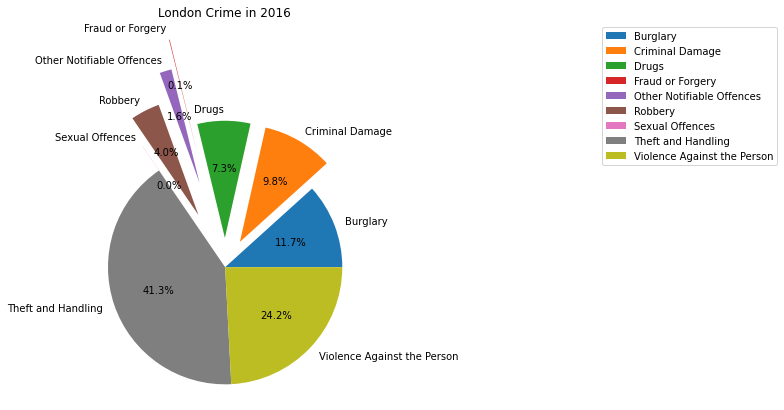

In [79]:
Crime2016 = df_crime.groupby(['Major_Category'])['Value'].sum()
Crime2016.plot(kind='pie', autopct='%.1f%%', explode=[0,0.25,0.25,1,0.75,0.5,0.25,0,0] ,legend=True, ylabel='', rot=10, figsize=(5,7))

plt.legend(bbox_to_anchor=(2.5,1.0))
plt.title('London Crime in 2016')
plt.axis('equal')

plt.show()

In [ ]:
#Pada tahun 2016, wilayah Westminster menjadi wilayah yang paling tinggi tingkat kejahatannya dalam kategori "Theft and Handling" sebesar 41.3%.
#Kemudian diikuti wilayah-wilayah berikut ini : Camden, Lambeth, Southwark dan Islington dengan tipe kejahatan yang sama yaitu "Theft and Handling".